In [2]:
import sys
import sklearn
import matplotlib
import numpy
import pandas
import seaborn
import fix_yahoo_finance

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Seavorn: {}'.format(seaborn.__version__))
print('Yahoo Finance: {}'.format(fix_yahoo_finance.__version__))

Python: 3.7.2 (tags/v3.7.2:9a3ffc0492, Dec 23 2018, 22:20:52) [MSC v.1916 32 bit (Intel)]
Sklearn: 0.20.3
Matplotlib: 3.0.3
Numpy: 1.16.2
Pandas: 0.24.2
Seavorn: 0.9.0
Yahoo Finance: 0.0.22


In [3]:
# importing the necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
from sklearn.linear_model import LinearRegression as lr

In [5]:
# Read data
Df = yf.download('GLD','2008-01-01','2019-03-31')
print(Df)

[*********************100%***********************]  1 of 1 downloaded
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2007-12-31   82.739998   82.830002   81.980003   82.459999   82.459999   
2008-01-02   83.559998   85.139999   83.440002   84.860001   84.860001   
2008-01-03   84.870003   85.940002   84.599998   85.570000   85.570000   
2008-01-04   85.339996   85.550003   84.430000   85.129997   85.129997   
2008-01-07   85.239998   85.260002   84.570000   84.769997   84.769997   
2008-01-08   86.279999   87.129997   86.160004   86.779999   86.779999   
2008-01-09   86.559998   87.199997   86.300003   86.550003   86.550003   
2008-01-10   86.419998   88.459999   86.410004   88.250000   88.250000   
2008-01-11   88.040001   88.760002   87.849998   88.580002   88.580002   
2008-01-14   89.449997   89.940002   89.000000   89.540001   89.540001   
2008-01-15   89.599998   90.349998   87.91

In [6]:
# Only keep close columns 
Df=Df[['Close']]
print(Df)

                 Close
Date                  
2007-12-31   82.459999
2008-01-02   84.860001
2008-01-03   85.570000
2008-01-04   85.129997
2008-01-07   84.769997
2008-01-08   86.779999
2008-01-09   86.550003
2008-01-10   88.250000
2008-01-11   88.580002
2008-01-14   89.540001
2008-01-15   87.989998
2008-01-16   86.699997
2008-01-17   86.500000
2008-01-18   87.419998
2008-01-22   88.169998
2008-01-23   87.889999
2008-01-24   90.080002
2008-01-25   90.300003
2008-01-28   91.750000
2008-01-29   91.150002
2008-01-30   92.059998
2008-01-31   91.400002
2008-02-01   89.349998
2008-02-04   89.099998
2008-02-05   87.680000
2008-02-06   88.949997
2008-02-07   89.849998
2008-02-08   91.000000
2008-02-11   91.330002
2008-02-12   89.330002
...                ...
2019-02-15  124.800003
2019-02-19  126.699997
2019-02-20  126.480003
2019-02-21  125.050003
2019-02-22  125.500000
2019-02-25  125.370003
2019-02-26  125.580002
2019-02-27  124.690002
2019-02-28  123.989998
2019-03-01  121.879997
2019-03-04 

In [7]:
# Drop rows with missing values 
Df= Df.dropna()
print(Df)

                 Close
Date                  
2007-12-31   82.459999
2008-01-02   84.860001
2008-01-03   85.570000
2008-01-04   85.129997
2008-01-07   84.769997
2008-01-08   86.779999
2008-01-09   86.550003
2008-01-10   88.250000
2008-01-11   88.580002
2008-01-14   89.540001
2008-01-15   87.989998
2008-01-16   86.699997
2008-01-17   86.500000
2008-01-18   87.419998
2008-01-22   88.169998
2008-01-23   87.889999
2008-01-24   90.080002
2008-01-25   90.300003
2008-01-28   91.750000
2008-01-29   91.150002
2008-01-30   92.059998
2008-01-31   91.400002
2008-02-01   89.349998
2008-02-04   89.099998
2008-02-05   87.680000
2008-02-06   88.949997
2008-02-07   89.849998
2008-02-08   91.000000
2008-02-11   91.330002
2008-02-12   89.330002
...                ...
2019-02-15  124.800003
2019-02-19  126.699997
2019-02-20  126.480003
2019-02-21  125.050003
2019-02-22  125.500000
2019-02-25  125.370003
2019-02-26  125.580002
2019-02-27  124.690002
2019-02-28  123.989998
2019-03-01  121.879997
2019-03-04 

Gold ETF Price Series


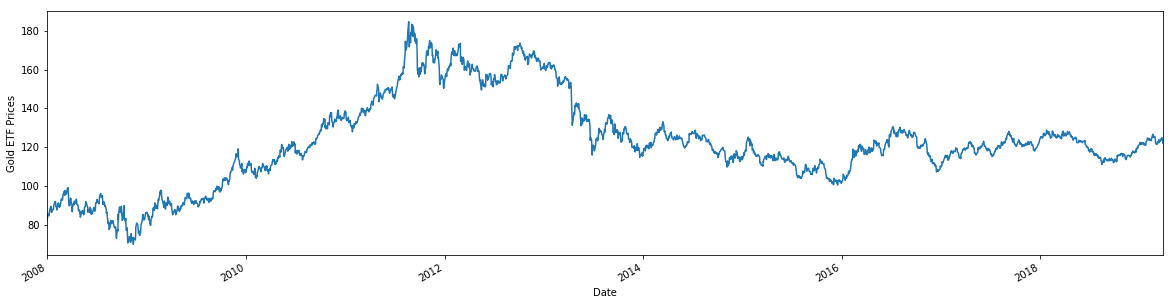

In [8]:
# Plot the closing price of GLD 
Df.Close.plot(figsize=(20,5)) 
plt.ylabel("Gold ETF Prices")
print ("Gold ETF Price Series")
plt.show()

In [9]:
#Define explanatory variables
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2008-01-14,87.793335,85.883333
2008-01-15,88.790001,86.670000
2008-01-16,88.703334,87.017777
2008-01-17,88.076665,87.143333
2008-01-18,87.063332,87.295555


In [10]:
#Define dependent variable
y = Df['Close']
y.head()

Date
2008-01-14    89.540001
2008-01-15    87.989998
2008-01-16    86.699997
2008-01-17    86.500000
2008-01-18    87.419998
Name: Close, dtype: float64

In [11]:
#Split the data into train and test dataset
t=.8 
t = int(t*len(Df))
print(t)

2257


In [13]:
# Train dataset 
X_train = X[:t] 
y_train = y[:t]

In [14]:
# Test dataset 
X_test = X[t:] 
y_test = y[t:]
print(X_test)

                   S_3         S_9
Date                              
2016-12-29  108.450000  108.062221
2016-12-30  109.236667  108.389999
2017-01-03  109.586668  108.563332
2017-01-04  110.123334  108.772222
2017-01-05  110.313334  109.113333
2017-01-06  111.303335  109.638889
2017-01-09  111.730001  110.101112
2017-01-10  112.333333  110.627778
2017-01-11  112.523333  111.137779
2017-01-12  113.106667  111.653334
2017-01-13  113.520002  112.055557
2017-01-17  113.873334  112.566667
2017-01-18  114.656667  113.164445
2017-01-19  114.976667  113.610001
2017-01-20  115.163333  113.853333
2017-01-23  114.896668  114.220000
2017-01-24  115.203334  114.566667
2017-01-25  115.370000  114.802222
2017-01-26  115.126666  114.893334
2017-01-27  114.283333  114.821111
2017-01-30  113.690000  114.741111
2017-01-31  113.573334  114.532222
2017-02-01  114.336667  114.607778
2017-02-02  114.906667  114.655556
2017-02-03  115.529999  114.743333
2017-02-06  115.723330  114.781110
2017-02-07  116.5566

In [15]:
#Create a linear regression model
linear = lr().fit(X_train,y_train)
print("Linear Regression equation")
print("Gold ETF Price (y) =", \
round(linear.coef_[0],2), "* 3 Days Moving Average (x1)", \
round(linear.coef_[1],2), "* 9 Days Moving Average (x2) +", \
round(linear.intercept_,2), "(constant)")

Linear Regression equation
Gold ETF Price (y) = 1.2 * 3 Days Moving Average (x1) -0.2 * 9 Days Moving Average (x2) + 0.41 (constant)


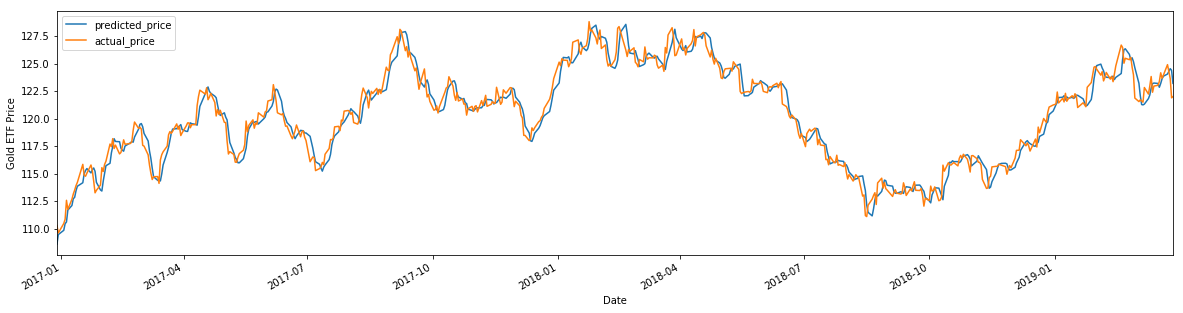

In [16]:
#Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(20,5))  
y_test.plot()  
plt.legend(['predicted_price'])  
plt.ylabel("Gold ETF Price")  
plt.show()

In [ ]:
#Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(20,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Gold ETF Price")
plt.xlabel("Year")
plt.show()

In [15]:
# R square
r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))

95.64

2